# **Problem Statement**
The copper industry deals with less complex data related to sales and pricing. However, this data may suffer from issues such as skewness and noisy data, which can affect the accuracy of manual predictions. Dealing with these challenges manually can be time-consuming and may not result in optimal pricing decisions. A machine learning regression model can address these issues by utilizing advanced techniques such as data normalization, feature scaling, and outlier detection, and leveraging algorithms that are robust to skewed and noisy data.
Another area where the copper industry faces challenges is in capturing the leads. A lead classification model is a system for evaluating and classifying leads based on how likely they are to become a customer . You can use the STATUS variable with WON being considered as Success and LOST being considered as Failure and remove data points other than WON, LOST STATUS values.


# **Importing All Necessary Libraries**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

# **Reading the Data**

In [2]:
data=pd.read_csv('Copper_Set.xlsx - Result 1.csv')

In [3]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
data_1=data.copy()
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
data_1.shape

(181673, 14)

In [6]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [7]:
data_1.drop(columns = ['id'],inplace=True)

In [8]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0


# **Checking and Handling Null Values**

In [9]:
data_1.isnull().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [10]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(data_1.isna().mean()*100).T

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,0.00055,0.0,0.00055,0.015412,0.001101,0.0,0.013211,0.00055,0.0,42.889697,0.0,0.00055,0.00055


In [11]:
#data_2=data_1.drop(columns=['material_ref'],inplace=True)
# material_ref has large set of null values, so replacing them with unknown
data_1['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
#data_1 = data_1.dropna()

In [12]:
data_1.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     1
selling_price     1
dtype: int64

In [13]:
# filling the missing values using statistical techniques
data_1 = data_1.fillna({'item_date': st.mode(data_1['item_date']),
                'delivery date': st.mode(data_1['delivery date']),
                'customer': data_1['customer'].mean(),
                'country': data_1['country'].mean(),
                'application': data_1['application'].mean(),
                'selling_price': data_1['selling_price'].mean(),
                'thickness': data_1['thickness'].median()})

In [14]:
data_1['status'].fillna(data_1['status'].mode()[0], inplace = True)

In [15]:
data_1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# **DataType Correction**

In [16]:
data_1.dtypes

item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

Column "item_data","delivery date","customer","country" has wrong datatype has to convert to right datatype

In [17]:
data_1['item_date'] = pd.to_datetime(data_1['item_date'])
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'])

In [18]:
data_1['customer'] = data_1['customer'].astype(int)
data_1['country'] = data_1['country'].astype(int)

In [19]:
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')

In [20]:
data_1.dtypes

item_date        datetime64[ns]
quantity tons           float64
customer                  int64
country                   int64
status                   object
item type                object
application             float64
thickness               float64
width                   float64
material_ref             object
product_ref               int64
delivery date    datetime64[ns]
selling_price           float64
dtype: object

# **Checking the Value Counts**

In [21]:
data_1['customer'].value_counts()

30157111    4988
30161088    3733
30201846    3152
30165529    2728
30202938    2570
            ... 
30356522       1
30227446       1
30229958       1
30356502       1
30160068       1
Name: customer, Length: 1170, dtype: int64

In [22]:
data_1['country'].value_counts()

78     32084
26     27516
25     23362
27     21511
32     18658
28     15824
84     12776
77      9714
30      8702
39      3731
79      2742
38      1712
40      1683
80       819
113      714
89        92
44        28
107        5
Name: country, dtype: int64

In [23]:
data_1['status'].value_counts()

Won                116012
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [24]:
data_1['item type'].value_counts()

W         105615
S          69236
PL          5660
Others       610
WI           524
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [25]:
data_1['application'].value_counts()

10.000000    77544
41.000000    46261
15.000000    20772
59.000000     8927
42.000000     5858
56.000000     4846
29.000000     1937
27.000000     1784
26.000000     1650
28.000000     1591
40.000000     1576
25.000000     1498
79.000000     1422
22.000000     1023
20.000000      768
66.000000      718
3.000000       657
38.000000      511
58.000000      447
4.000000       286
39.000000      267
65.000000      247
67.000000      221
68.000000      181
99.000000      146
19.000000      143
69.000000      122
5.000000       110
70.000000      102
2.000000        34
25.615809       24
Name: application, dtype: int64

In [26]:
data_1['thickness'].value_counts()

2.00     13468
3.00     13207
0.50     12247
1.50     11732
1.00      9474
         ...  
7.06         1
9.39         1
15.66        1
2.28         1
15.60        1
Name: thickness, Length: 594, dtype: int64

In [27]:
data_1['quantity tons'].value_counts()

54.151139     1
31.137432     1
31.144159     1
32.431644     1
31.925345     1
             ..
11.030492     1
13.869590     1
2.738536      1
233.264013    1
406.686538    1
Name: quantity tons, Length: 181672, dtype: int64

In [28]:
data_1['width'].value_counts()

1250.0    39149
1500.0    32681
1000.0    12271
2000.0     7613
1220.0     4785
          ...  
881.0         1
656.0         1
406.0         1
234.0         1
1786.0        1
Name: width, Length: 1386, dtype: int64

In [29]:
data_1['product_ref'].value_counts()

611993        45727
164141591     28785
640665        27375
1670798778    18916
628377        18574
1668701718    15284
640405         9715
1671863738     5162
1332077137     4561
1693867550     1825
1668701376     1216
1671876026      823
628117          775
164337175       653
1668701698      374
1693867563      293
1282007633      281
1721130331      257
1665572374      202
628112          177
611728          148
1690738206      147
1722207579      125
640400           83
1668701725       56
164336407        49
611733           45
1690738219       19
1665584320       12
1665572032       10
1665584642        2
929423819         1
1665584662        1
Name: product_ref, dtype: int64

# **Detecting Outliers**

In [30]:
data_1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816730e+05,181673.000000,181673.000000,181673.000000,181673.000000,1.816730e+05,1.816730e+05
mean,5.874926e+03,3.051221e+07,44.892884,25.615809,2.564822,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433375e+07,24.402336,17.753002,6.572303,261.631754,7.175101e+08,3.317947e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [31]:
data_1.shape

(181673, 13)

# **Treating Outliers Using IQR Method**

In [32]:
q3 = data_1['application'].quantile(0.75)
q1 = data_1['application'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(87.5, -36.5)

In [33]:
q3 = data_1['customer'].quantile(0.75)
q1 = data_1['customer'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(30405714.0, 30071586.0)

In [34]:
q3 = data_1['quantity tons'].quantile(0.75)
q1 = data_1['quantity tons'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(151.44608370000003, -73.31517328000001)

In [35]:
q3 = data_1['thickness'].quantile(0.75)
q1 = data_1['thickness'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(6.449999999999999, -2.75)

In [36]:
q3 = data_1['width'].quantile(0.75)
q1 = data_1['width'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(1980.0, 700.0)

In [37]:
q3 = data_1['product_ref'].quantile(0.75)
q1 = data_1['product_ref'].quantile(0.25)
iqr = (q3 - q1)
upper_threshold = q3 + (1.5*iqr)
lower_threshold = q1 - (1.5*iqr)
upper_threshold ,lower_threshold

(3329274853.0, -1996585723.0)

# **Checking for Duplicates**

In [38]:
data_1.drop_duplicates()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
1,1970-01-01 00:00:00.020210401,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1970-01-01 00:00:00.020210401,1047.00
2,1970-01-01 00:00:00.020210401,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,1970-01-01 00:00:00.020210401,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,1970-01-01 00:00:00.020210401,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,1970-01-01 00:00:00.020200702,102.482422,30200854,25,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,1970-01-01 00:00:00.020200701,591.00
181669,1970-01-01 00:00:00.020200702,208.086469,30200854,25,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,1970-01-01 00:00:00.020200701,589.00
181670,1970-01-01 00:00:00.020200702,4.235594,30200854,25,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,1970-01-01 00:00:00.020200701,619.00
181671,1970-01-01 00:00:00.020200702,-2000.000000,30200854,25,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,1970-01-01 00:00:00.020200701,601.00


In [39]:
data_1.shape

(181673, 13)

In [40]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.0


# **Checking and Handling Skewness**

In [41]:
df=data_1.copy()
df.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.0


In [42]:
df_1=df.select_dtypes(["int64","float64"])

quantity tons
nan


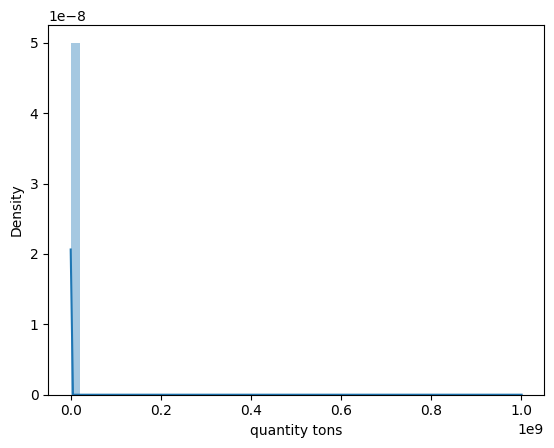

customer
86.984590056198


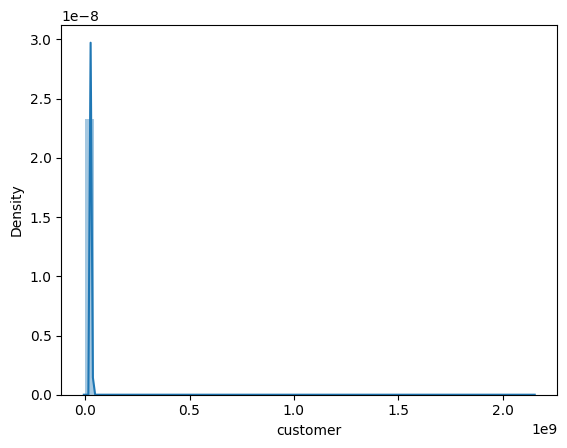

country
0.7536630642256824


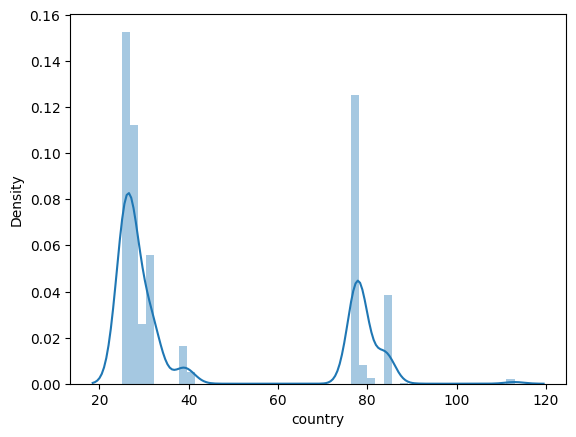

application
0.7244009800031509


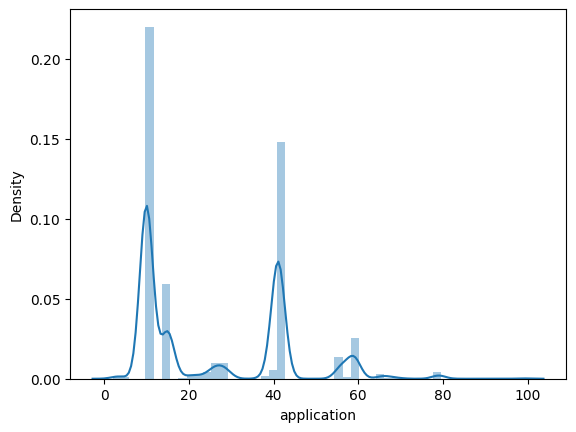

thickness
303.4450657126513


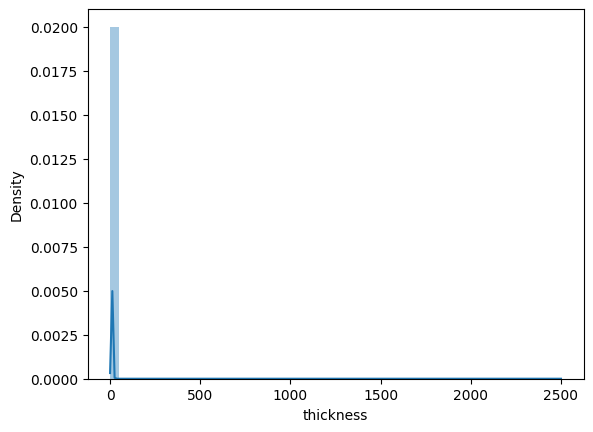

width
0.37459367901082125


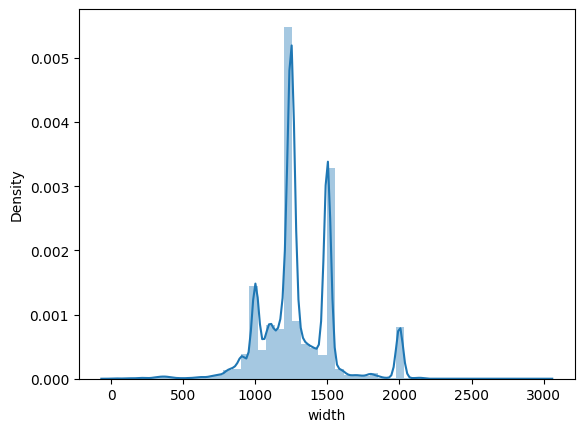

product_ref
1.0152071910463223


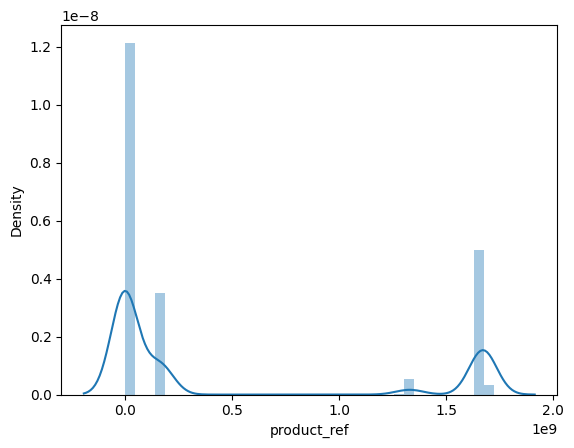

selling_price
301.38559943409905


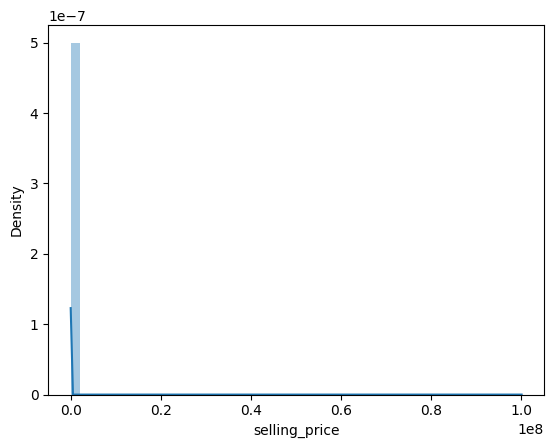

In [43]:
from scipy.stats import skew
for col in df_1:
  print(col)
  print(skew(df_1[col]))
  plt.figure()
  sns.distplot(df_1[col])
  plt.show()

In [44]:
import numpy as np
mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())

7
4
0


In [45]:
df.isnull().sum()

item_date        0
quantity tons    5
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [46]:
df.dropna(inplace=True)

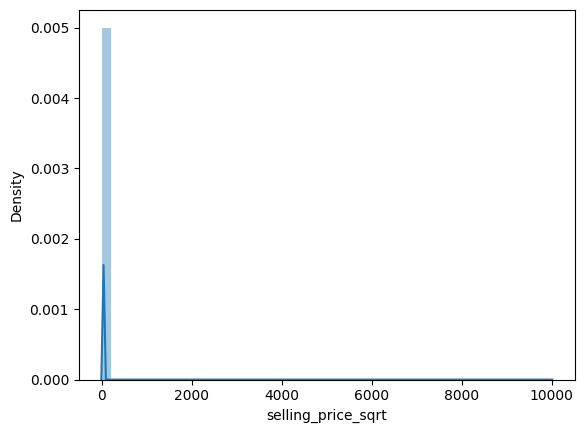

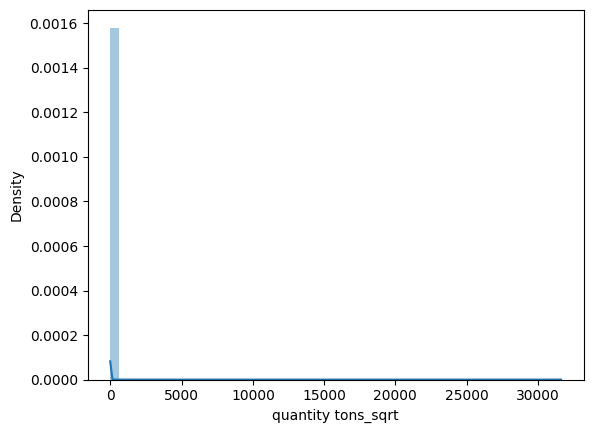

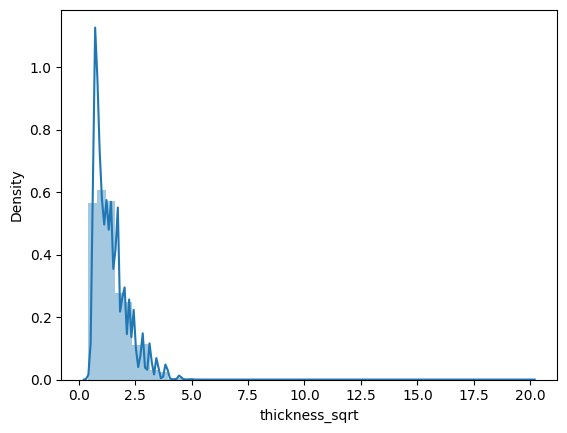

In [47]:
import numpy as np
df['selling_price_sqrt'] = np.sqrt(df['selling_price'])
sns.distplot(df['selling_price_sqrt'])
plt.show()

df['quantity tons_sqrt'] = np.sqrt(df['quantity tons'])
sns.distplot(df['quantity tons_sqrt'])
plt.show()

df['thickness_sqrt'] = np.sqrt(df['thickness'])
sns.distplot(df['thickness_sqrt'])
plt.show()

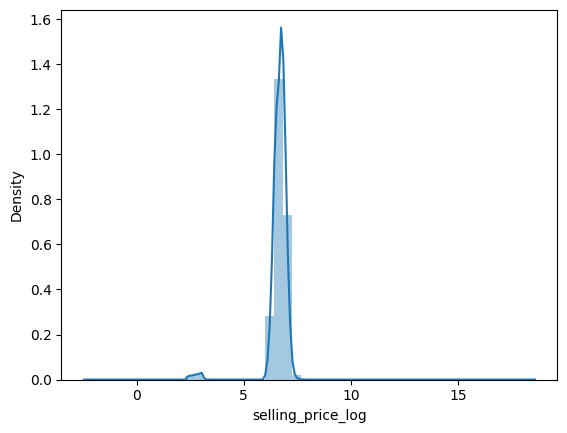

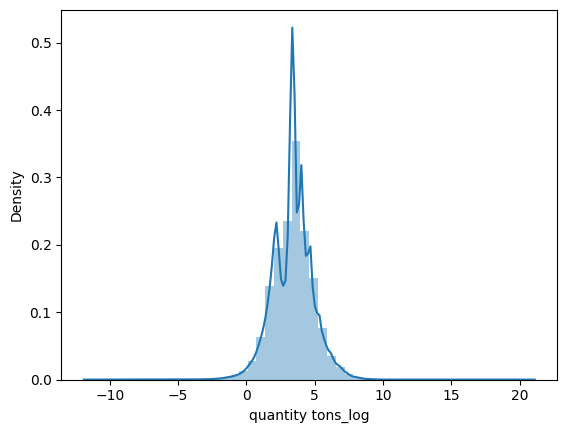

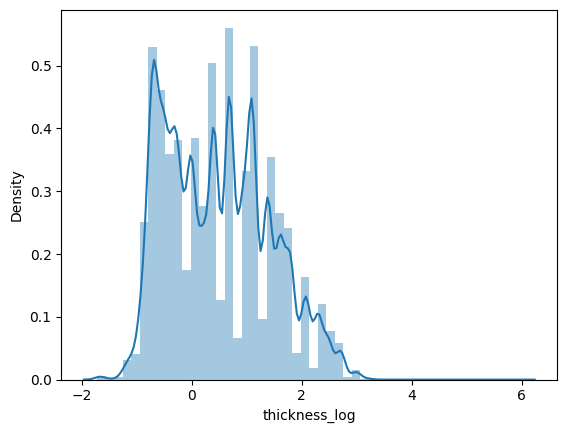

In [48]:
import numpy as np
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()


In [49]:
Continues=['quantity tons_log','customer','country','application','thickness_log','width','selling_price_log','thickness_sqrt','quantity tons_sqrt','selling_price_sqrt']
for i in Continues:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.06876412782345748
customer -- 86.98243434273999
country -- 0.7536202769405994
application -- 0.7244797582927255
thickness_log -- 0.3490201983572102
width -- 0.374556107888828
selling_price_log -- -5.335269819675665
thickness_sqrt -- 1.3794083538751347
quantity tons_sqrt -- 396.0098873755553
selling_price_sqrt -- 292.3494452133494


In [50]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_sqrt,quantity tons_sqrt,thickness_sqrt,selling_price_log,quantity tons_log,thickness_log
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00,29.223278,7.358746,1.414214,6.749931,3.991779,0.693147
1,1970-01-01 00:00:00.020210401,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,1970-01-01 00:00:00.020210401,1047.00,32.357379,27.713261,0.894427,6.953684,6.643822,-0.223144
2,1970-01-01 00:00:00.020210401,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33,25.383656,19.650139,0.616441,6.468211,5.956169,-0.967584
3,1970-01-01 00:00:00.020210401,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00,27.712813,14.227124,1.516575,6.643790,5.310301,0.832909
4,1970-01-01 00:00:00.020210401,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00,24.020824,28.027241,2.000000,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,1970-01-01 00:00:00.020200702,106.783299,30200854,25,Won,W,41.0,0.96,1240.0,0000000000000000000000000000000001000222,164141591,1970-01-01 00:00:00.020200701,602.00,24.535688,10.333600,0.979796,6.400257,4.670802,-0.040822
181668,1970-01-01 00:00:00.020200702,102.482422,30200854,25,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,1970-01-01 00:00:00.020200701,591.00,24.310492,10.123360,0.979796,6.381816,4.629691,-0.040822
181669,1970-01-01 00:00:00.020200702,208.086469,30200854,25,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,1970-01-01 00:00:00.020200701,589.00,24.269322,14.425203,0.974679,6.378426,5.337954,-0.051293
181670,1970-01-01 00:00:00.020200702,4.235594,30200854,25,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,1970-01-01 00:00:00.020200701,619.00,24.879711,2.058056,0.842615,6.428105,1.443523,-0.342490


In [51]:
df.shape

(181661, 19)

In [52]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'selling_price_sqrt',
       'quantity tons_sqrt', 'thickness_sqrt', 'selling_price_log',
       'quantity tons_log', 'thickness_log'],
      dtype='object')

In [53]:
df.drop(columns=['selling_price_sqrt','quantity tons_sqrt','thickness_sqrt'],inplace=True)

In [54]:
material_null=df['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
df['material_ref'][replace_null]=np.NaN

In [55]:
df['material_ref'].isnull().sum()

22722

In [56]:
df['material_ref'].fillna(df['material_ref'].mode()[0],inplace=True)
df['material_ref'].isnull().sum()

0

In [57]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00,6.749931,3.991779,0.693147
1,1970-01-01 00:00:00.020210401,768.024839,30202938,25,Won,W,41.0,0.80,1210.0,unknown,1668701718,1970-01-01 00:00:00.020210401,1047.00,6.953684,6.643822,-0.223144
2,1970-01-01 00:00:00.020210401,386.127949,30153963,30,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33,6.468211,5.956169,-0.967584
3,1970-01-01 00:00:00.020210401,202.411065,30349574,32,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00,6.643790,5.310301,0.832909
4,1970-01-01 00:00:00.020210401,785.526262,30211560,28,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,1970-01-01 00:00:00.020200702,106.783299,30200854,25,Won,W,41.0,0.96,1240.0,unknown,164141591,1970-01-01 00:00:00.020200701,602.00,6.400257,4.670802,-0.040822
181668,1970-01-01 00:00:00.020200702,102.482422,30200854,25,Won,W,41.0,0.96,1220.0,unknown,164141591,1970-01-01 00:00:00.020200701,591.00,6.381816,4.629691,-0.040822
181669,1970-01-01 00:00:00.020200702,208.086469,30200854,25,Won,W,41.0,0.95,1500.0,unknown,164141591,1970-01-01 00:00:00.020200701,589.00,6.378426,5.337954,-0.051293
181670,1970-01-01 00:00:00.020200702,4.235594,30200854,25,Won,W,41.0,0.71,1250.0,unknown,164141591,1970-01-01 00:00:00.020200701,619.00,6.428105,1.443523,-0.342490


In [58]:
#df[['quantity tons','selling_price']].plot.scatter(x='quantity tons',y='selling_price')
#df[['quantity tons','selling_price']].corr()

In [59]:
#df[['quantity tons_log','selling_price_log']].plot.scatter(x='quantity tons_log',y='selling_price_log')
#df[['quantity tons_log','selling_price_log']].corr()


In [60]:
#df[['thickness','selling_price']].plot.scatter(x='thickness',y='selling_price')
#df[['thickness','selling_price']].corr()

In [61]:
#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()
#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()

# **Visualization**

<Axes: xlabel='item type'>

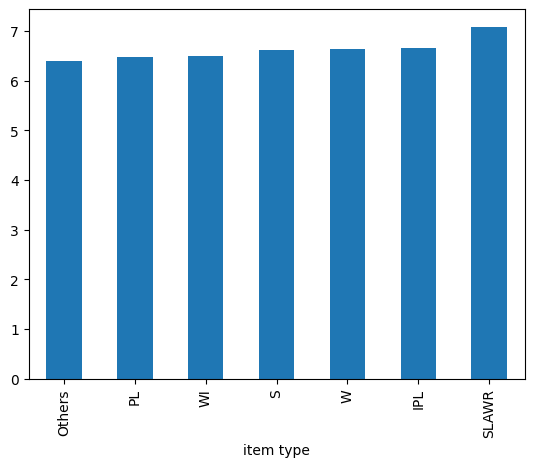

In [62]:
df.groupby('item type')['selling_price_log'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='status'>

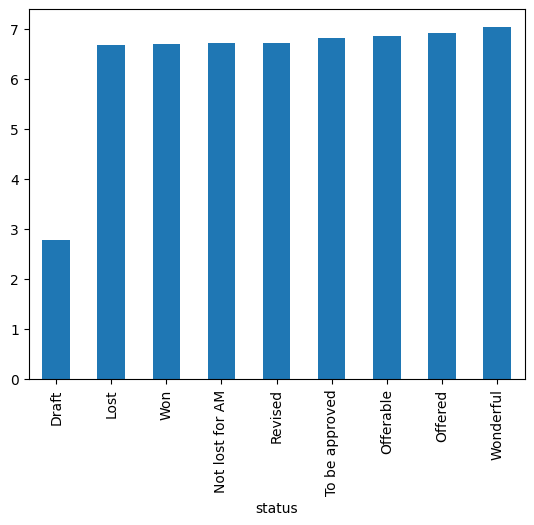

In [63]:
df.groupby('status')['selling_price_log'].mean().sort_values().plot(kind='bar')

# **Checking Correlation using HeatMap**

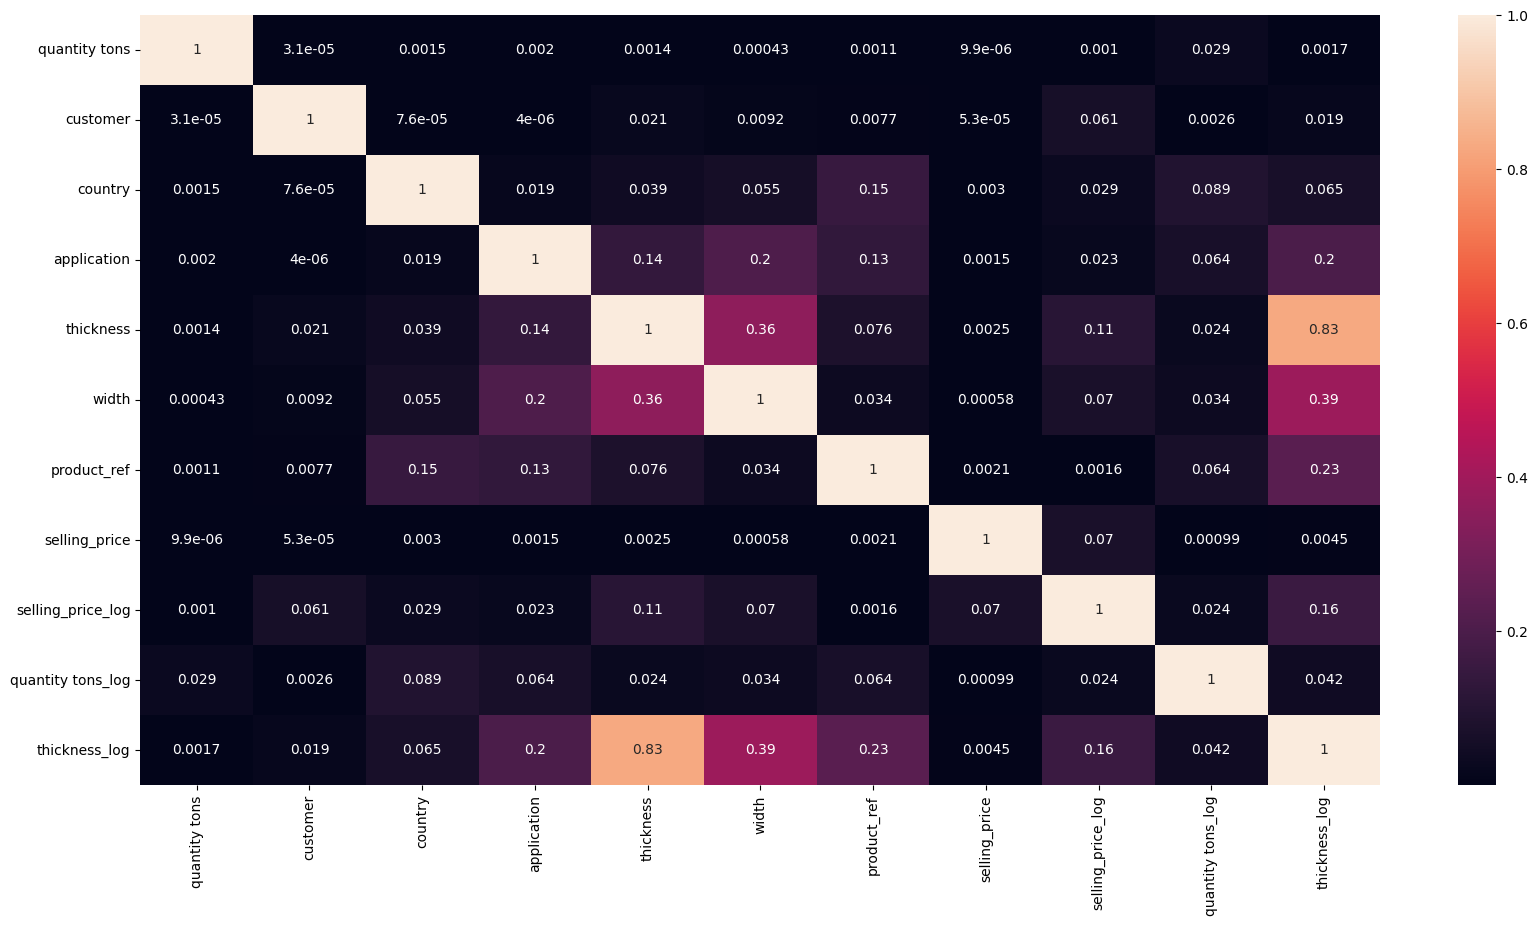

In [64]:
# Select only numeric columns from your DataFrame
numeric_data = df.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: >

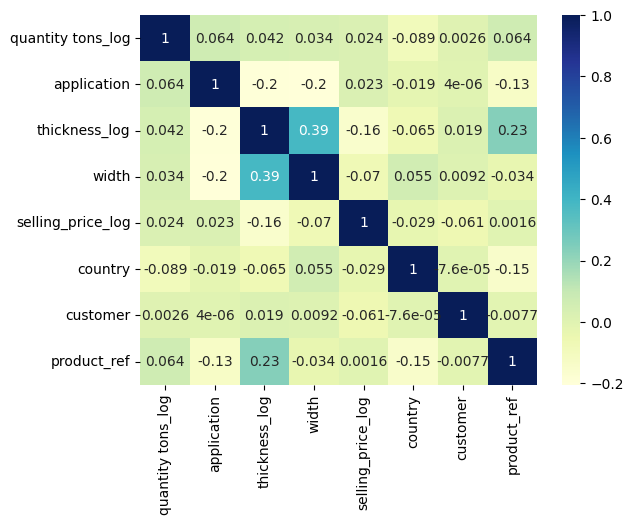

In [65]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [66]:
unique_item_types = df['item type'].unique()

print(unique_item_types)

['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [67]:
unique_status = df['status'].unique()

print(unique_status)

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']


In [68]:
# encoding categorical variables
a = OneHotEncoder(handle_unknown='ignore')
a.fit(df[['item type']])
a1= a.fit_transform(df[['item type']]).toarray()
b = OneHotEncoder(handle_unknown='ignore')
b.fit(df[['status']])
b2 = b.fit_transform(df[['status']]).toarray()

In [69]:
a1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# **Splitting the Data**

In [70]:
X=df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df['selling_price_log']

In [71]:
# independent features after encoding
import numpy as np
X= np.concatenate((df[['quantity tons_log',
                       'application',
                       'thickness_log',
                       'width','country',
                       'customer',
                       'product_ref']].values, a1, b2), axis=1)

y=df['selling_price_log']


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Scaling**

In [73]:
#from sklearn.preprocessing import StandardScaler()
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

# **Implementing ML Models**

# **LINEAR REGRESSION**

In [74]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.coef_,lr_model.intercept_

(array([-9.75905744e-03,  1.27971496e-02, -1.13957210e-01,  3.75068573e-03,
        -1.01782619e-02,  2.21675961e-03,  8.86701071e-03,  1.58212903e+10,
         8.08654071e+10,  2.40498611e+11,  6.71982397e+11,  3.62987772e+09,
         6.82652938e+11,  7.44591802e+10, -1.96535981e+11, -5.92366209e+11,
        -4.67773009e+11, -9.70814131e+09, -2.47481906e+10, -2.28024460e+11,
        -2.24313364e+11, -7.25451540e+11, -3.96340027e+09]),
 6.626159807175591)

In [75]:
#r2_score(y_test,lr_model.predict(X_test))

In [76]:
lr_model.score(X_test, y_test)

0.8572259177794522

In [77]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.855090983377146
0.8572259177794522


In [78]:
from sklearn.model_selection import cross_val_score
#synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_lr_model=cross_val_score(lr_model,X_train,y_train,cv=10).mean()
cross_val_lr_model

-6.572457315531768e+18

# **DECISION TREE**
CHOOSING THE BEST DEPTH VALUE

In [79]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.8116927795258321 cross_val_score :  0.8111801001095216
Depth :  2  train Score  :  0.8623856818388331 cross_val_score :  0.8619583586800784
Depth :  3  train Score  :  0.870825570163194 cross_val_score :  0.8703789509061265
Depth :  4  train Score  :  0.8774884173715733 cross_val_score :  0.8769999873778473
Depth :  5  train Score  :  0.8838170399484764 cross_val_score :  0.8802322441330912
Depth :  6  train Score  :  0.8863932879370914 cross_val_score :  0.8826029613900881
Depth :  7  train Score  :  0.8894755197428563 cross_val_score :  0.8856038483691832
Depth :  8  train Score  :  0.8940524270199981 cross_val_score :  0.8893906312467941
Depth :  9  train Score  :  0.8994882390507549 cross_val_score :  0.8936527330629895
Depth :  10  train Score  :  0.9043908278469726 cross_val_score :  0.8975786633371259
Depth :  11  train Score  :  0.9095916080507693 cross_val_score :  0.9014375745910719
Depth :  12  train Score  :  0.9156320578808408 cross_val_score 

In [80]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor

0.9109105184958972

In [81]:
print("The best depth is 14 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 14 and Cross_val_score is: 0.9109105184958972


**IMPLEMENTING DECISION TREE REGRESSION**

In [82]:
dt_regressor=DecisionTreeRegressor(max_depth=14, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=14, random_state=0)

In [83]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9109105184958972

In [84]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
14,0.873357,quantity tons_log
6,0.071154,application
5,0.014886,item type
4,0.011040,status
0,0.009106,item_date
2,0.006811,customer
1,0.003692,quantity tons
3,0.002390,country
12,0.001567,selling_price
10,0.000996,product_ref


# **EXTREME GRADIENT BOOSTING**
Choosing the Best Learning Rate



In [85]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3,0.4]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7663860823498762
Learning rate :  0.05 cross_val_score: 0.8970840620504987
Learning rate :  0.08 cross_val_score: 0.9026394719318718
Learning rate :  0.1 cross_val_score: 0.9051415411599062
Learning rate :  0.2 cross_val_score: 0.9127351680064353
Learning rate :  0.25 cross_val_score: 0.9148961795806932
Learning rate :  0.3 cross_val_score: 0.9161260244342136
Learning rate :  0.4 cross_val_score: 0.9174278373530455


In [86]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9174278373530455

In [87]:
print("The best Learning rate is 0.4 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.4 and Cross_val_score is: 0.9174278373530455


**Implementing Xtreme Gradient Boosting Regression**

In [88]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.4,n_estimators=100) # initialise the model
xgb_regressor.fit(X_train,y_train) #train the model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.4, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [89]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9174278373530455

# **RANDOM FOREST**
Choosing the Best Depth Value

In [90]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())


Depth :  2 cross_val_score :  0.8619646779607096
Depth :  4 cross_val_score :  0.8773771863864817
Depth :  8 cross_val_score :  0.8922624368558887
Depth :  10 cross_val_score :  0.9025162843769744
Depth :  12 cross_val_score :  0.9124799399973096
Depth :  14 cross_val_score :  0.9205801635969502
Depth :  16 cross_val_score :  0.9261921637100288
Depth :  18 cross_val_score :  0.9292740060257515


In [91]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.9292740060257515

In [92]:
print("The best depth is 18 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 18 and Cross_val_score is: 0.9292740060257515


**Implementing Random Forest Regression**

In [93]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [94]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=10).mean()
cross_val_rf_regressor

0.9292740060257515

# **R2 SCORE FOR MACHINE LEARNING MODELS**

In [95]:
from sklearn.metrics import r2_score
y_pred_lr=lr_model.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [96]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [97]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.8572259177794522
R2 Score for Decision Tree Regression Model:  0.9138438776729485
R2 Score for Random Forest Regression Model:  0.9322943138156983
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9219118893842797


# **CROSS VALIDATION SCORE FOR MACHINE LEARNING MODELS**

In [98]:
print("Cross Validation Score for Linear Regression Model:",cross_val_lr_model)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)


Cross Validation Score for Linear Regression Model: -6.572457315531768e+18
Cross Validation Score for Decision Tree Regression Model:  0.9109105184958972
Cross Validation Score for Random Forest Regression Model:  0.9292740060257515
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9174278373530455


# **CLASSIFICATION**

In [99]:
df.status.value_counts()

Won                116003
Lost                34438
Not lost for AM     19571
Revised              4276
To be approved       4170
Draft                3139
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [100]:
df1 = df.copy()

In [101]:
df1 = df[df['status'].isin(['Won', 'Lost'])]
len(df1)

150441

In [102]:
df1.status.value_counts()

Won     116003
Lost     34438
Name: status, dtype: int64

In [103]:
#use ordinal encoder to convert categorical data into numerical data
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
df1.status = OE.fit_transform(df1[['status']])
df1['item type'] = OE.fit_transform(df1[['item type']])

In [104]:
X = df1[['quantity tons','selling_price','item type','application','thickness','width','country','customer','product_ref']]
y = df1['status']

In [105]:
#split data into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105308, 9)
(45133, 9)
(105308,)
(45133,)


In [106]:
#import classifier algorithms.
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [107]:
dtc = DecisionTreeClassifier(max_depth = 5, random_state = 1)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.8151422494017548
0.8132630226220282


In [108]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9224940175485243
0.8879976956993774


In [109]:
gbc = GradientBoostingClassifier(n_estimators = 30, learning_rate = 0.1,random_state = 28)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))

0.8198237550803358
0.8190902443888064


In [110]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth =6,random_state = 35)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.8199756903559083
0.8176278997629229


# **Decision Tree Classifier**
Choosing the Best Depth Value

In [111]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

max_depth = np.arange(1, 20)
cross_val_dt = []

for d in max_depth:
    dt_Classifier = DecisionTreeClassifier(max_depth=d, random_state=0)
    dt_Classifier.fit(X_train, y_train)
    train_score = dt_Classifier.score(X_train, y_train)
    cross_val_mean = cross_val_score(dt_Classifier, X_train, y_train, cv=10).mean()
    print("Depth:", d, "Train Score:", train_score, "Cross-Validation Score:", cross_val_mean)
    cross_val_dt.append(cross_val_mean)

Depth: 1 Train Score: 0.7718501918182854 Cross-Validation Score: 0.7718501925712383
Depth: 2 Train Score: 0.7718501918182854 Cross-Validation Score: 0.7718501925712383
Depth: 3 Train Score: 0.7718501918182854 Cross-Validation Score: 0.7718501925712383
Depth: 4 Train Score: 0.7974227978880997 Cross-Validation Score: 0.7955805935589432
Depth: 5 Train Score: 0.8151422494017548 Cross-Validation Score: 0.8153511664517268
Depth: 6 Train Score: 0.8230713715957002 Cross-Validation Score: 0.8189026491948026
Depth: 7 Train Score: 0.8380749800584951 Cross-Validation Score: 0.8355206060558512
Depth: 8 Train Score: 0.8503817373798762 Cross-Validation Score: 0.8450735047785027
Depth: 9 Train Score: 0.8630968207543587 Cross-Validation Score: 0.8543320976201677
Depth: 10 Train Score: 0.8740171686861397 Cross-Validation Score: 0.8624131576263376
Depth: 11 Train Score: 0.8861435028677783 Cross-Validation Score: 0.8728207039984965
Depth: 12 Train Score: 0.8989060660158772 Cross-Validation Score: 0.879591

In [112]:
cross_val_dt_Classifier=max(cross_val_dt)
cross_val_dt_Classifier

0.9066452709645821

In [113]:
print("The best depth is 18 and Cross_val_score is:",cross_val_dt_Classifier)

The best depth is 18 and Cross_val_score is: 0.9066452709645821


**Implementing Decision Tree Classifier**

In [114]:
dt_Classifier=DecisionTreeClassifier(max_depth=18, random_state=0)
dt_Classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=18, random_state=0)

In [115]:
dtc = DecisionTreeClassifier(max_depth = 18, random_state = 0)
dtc.fit(X_train, y_train)
train_score = dtc.score(X_train, y_train)
test_score = dtc.score(X_test, y_test)
print(train_score)
print(test_score)

0.9659000265886732
0.9080273857266302


# **RANDOM FOREST CLASSIFIER**
Choosing the Best Depth Value

In [116]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_Classifier=RandomForestClassifier(max_depth=d, random_state=0)
  rf_Classifier.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_Classifier,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.7718501925712383
Depth :  4 cross_val_score :  0.7874615720980422
Depth :  8 cross_val_score :  0.8368784909708532
Depth :  10 cross_val_score :  0.8598587086486305
Depth :  12 cross_val_score :  0.8820412803766711
Depth :  14 cross_val_score :  0.9012800511274858
Depth :  16 cross_val_score :  0.9163406577045674
Depth :  18 cross_val_score :  0.9254947600549475


In [117]:
# Find the maximum cross-validation score and its corresponding depth
max_cross_val_score = max(cross_val_rf)
best_depth = max_depth[cross_val_rf.index(max_cross_val_score)]

print("Best Depth:", best_depth)
print("Max Cross-Validation Score:", max_cross_val_score)

Best Depth: 18
Max Cross-Validation Score: 0.9254947600549475


**Implementing Random Forest Classifier**

In [124]:
rf_Classifier=RandomForestClassifier(max_depth=18, random_state=0)
rf_Classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=18, random_state=0)

In [125]:
rfc = RandomForestClassifier( max_depth =18,random_state = 0)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9785391423253694
0.9254868942902089


# **EXTREME GRADIENT BOOSTING CLASSIFIER**

In [139]:
xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100)# initialise the model
xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [140]:
gbc = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.25,random_state = 0)
gbc.fit(X_train, y_train)
print(gbc.score(X_train, y_train))
print(gbc.score(X_test, y_test))


0.8509609906179967
0.845811268916314


In [142]:
y_pred = gbc.predict(X_test)

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[ 5067,  5345],
       [ 1614, 33107]])

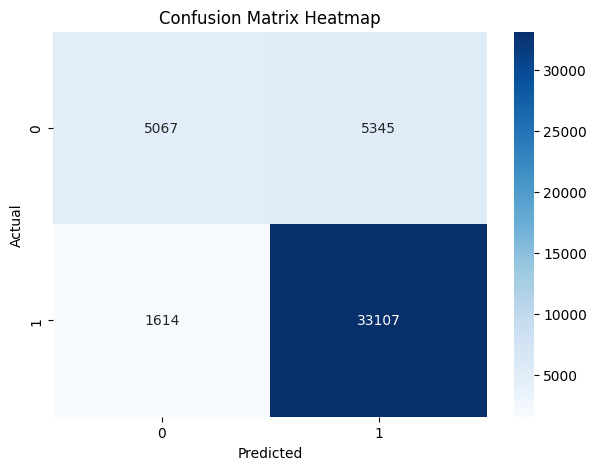

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a confusion matrix stored in 'cm'
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [146]:
# Evalution Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [147]:
#check accuracy score.
accuracy_score(y_test, y_pred)

0.845811268916314

In [153]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,y_pred, average = 'macro')
print("F1_Score:",f1)

F1_Score: 0.7488854454455145


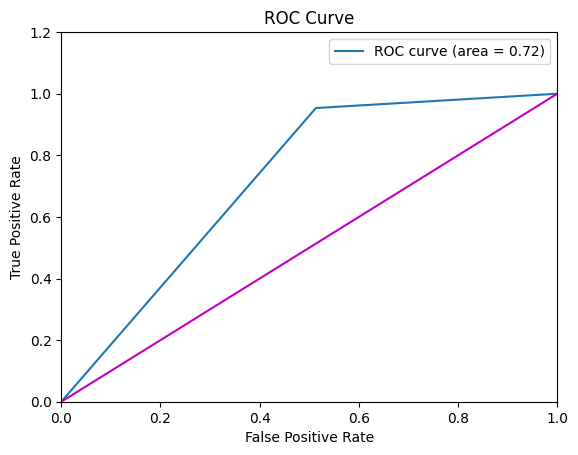

In [154]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'm-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.2])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.76      0.49      0.59     10412
         1.0       0.86      0.95      0.90     34721

    accuracy                           0.85     45133
   macro avg       0.81      0.72      0.75     45133
weighted avg       0.84      0.85      0.83     45133

